##################################################
CHECKING RE CPU idle and memory percent ex2300-vc
##################################################
2017-12-14 11:25:54 RE idle CPU and memory ==> 68  18
2017-12-14 11:25:58 RE idle CPU and memory ==> 68  18
2017-12-14 11:26:01 RE idle CPU and memory ==> 68  18
2017-12-14 11:26:04 RE idle CPU and memory ==> 48  18
2017-12-14 11:26:07 RE idle CPU and memory ==> 48  18
2017-12-14 11:26:10 RE idle CPU and memory ==> 48  18
2017-12-14 11:26:13 RE idle CPU and memory ==> 77  18
2017-12-14 11:26:16 RE idle CPU and memory ==> 77  18
2017-12-14 11:26:19 RE idle CPU and memory ==> 77  18
2017-12-14 11:26:22 RE idle CPU and memory ==> 77  18
2017-12-14 11:26:26 RE idle CPU and memory ==> 77  18
2017-12-14 11:26:29 RE idle CPU and memory ==> 80  18
2017-12-14 11:26:32 RE idle CPU and memory ==> 80  18
2017-12-14 11:26:35 RE idle CPU and memory ==> 80  18
2017-12-14 11:26:38 RE idle CPU and memory ==> 80  18
2017-12-14 11:26:41 RE idle CPU and me

2017-12-14 11:33:38 RE idle CPU and memory ==> 80  18
2017-12-14 11:33:41 RE idle CPU and memory ==> 80  18
2017-12-14 11:33:44 RE idle CPU and memory ==> 77  18
2017-12-14 11:33:47 RE idle CPU and memory ==> 77  18
2017-12-14 11:33:51 RE idle CPU and memory ==> 77  18
2017-12-14 11:33:54 RE idle CPU and memory ==> 81  18
2017-12-14 11:33:57 RE idle CPU and memory ==> 81  18
2017-12-14 11:34:00 RE idle CPU and memory ==> 81  18
2017-12-14 11:34:03 RE idle CPU and memory ==> 78  18
2017-12-14 11:34:06 RE idle CPU and memory ==> 78  18
2017-12-14 11:34:09 RE idle CPU and memory ==> 78  18
2017-12-14 11:34:12 RE idle CPU and memory ==> 76  18
2017-12-14 11:34:16 RE idle CPU and memory ==> 76  18
2017-12-14 11:34:19 RE idle CPU and memory ==> 76  18
2017-12-14 11:34:22 RE idle CPU and memory ==> 80  18
2017-12-14 11:34:25 RE idle CPU and memory ==> 80  18
2017-12-14 11:34:28 RE idle CPU and memory ==> 80  18
2017-12-14 11:34:31 RE idle CPU and memory ==> 80  18
2017-12-14 11:34:34 RE idle 

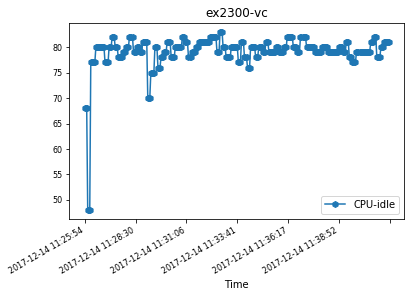

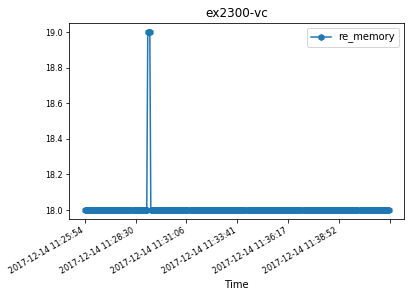

In [3]:
###START##OF#SCRIPT################
##Memory and CPU of the RE and FPC#
###Michal#Styszynski###############
#!/usr/bin/env python
import os
import pandas as pd
import logging
from jnpr.junos import Device
import datetime
import time
from time import sleep
from numpy import arange
import matplotlib.pyplot as plt
%matplotlib inline

now = datetime.datetime.now()

mydev = Device(user='root', host='10.170.130.43', password='Embe1mpls', port='830')

mydev.open()
if not os.path.exists('./tmp'):
    os.mkdir('tmp')


### check the RE CPU and memory 

print "#" * 50
print "CHECKING RE CPU idle and memory percent" + " " + mydev.facts['hostname']
print "#" * 50
now = datetime.datetime.now()
dt = str(time.strftime("%Y-%m-%d_%H_%M"))
fileName1003 = "./tmp/RE_idle_CPU_%s.csv"%dt
f1003 = open(fileName1003, 'w')
count = 0 
while count < 300:
    time.sleep(3)
    count = count + 1
    result303 = mydev.rpc.get_route_engine_information()
    for test444 in result303.xpath('//route-engine'):
        dt = str(time.strftime("%Y-%m-%d %H:%M:%S"))
        mastership = test444.find("mastership-state").text
        if mastership == 'master':
            re_cpu = test444.xpath("cpu-idle")[0].text
            re_memory = test444.xpath('//memory-buffer-utilization')[0].text
            print "%s RE idle CPU and memory ==> %s  %s" %(dt,re_cpu,re_memory)
            data1003 = {'Time': [dt], 'CPU-idle':[re_cpu],'re_memory':[re_memory]} 
            mydf1003 = pd.DataFrame(data=data1003)
            mydf1003.to_csv(fileName1003, mode='a', header=False, index=False, columns=['Time','CPU-idle','re_memory'])
mydf1004 = pd.read_csv(fileName1003, header=None, names=['Time','CPU-idle','re_memory'])
print mydf1004

## add some conditions for the RE CPU and memory 
mean1 = mydf1004['CPU-idle'].mean()
mean2 = mydf1004['re_memory'].mean()
if int(mean1) in range(10,40):
    print "==>KO RE CPU orange %s" % mean1
elif int(mean1) in range(0,10):
    print "==>KO RE CPU red %s " % mean1
else: 
    print "=>OK the mean value %s of idle RE CPU is green" % mean1

if int(mean2) in range(45,99):
    print "==>KO RE memory avg utilisation %s red" % mean2
elif int(mean2) in range(30,44):
    print "==>KO RE memory avg utilisation %s orange" % mean2
else: 
    print "=>OK the mean value %s of the RE memory total utilization is green" % mean2
f1003.close()


### plot the RE CPU and memory 

mydf1004.plot(x='Time', y='CPU-idle', kind='line',title=mydev.facts['hostname'],style='-h',fontsize=8)
plt.gcf().autofmt_xdate()

mydf1004.plot(x='Time', y='re_memory', kind='line',title=mydev.facts['hostname'],style='-h',fontsize=8)
plt.gcf().autofmt_xdate()
